# Time of Day Prediction

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import the dataset
df = pd.read_csv('boston-crime.csv')

In [30]:
# Reference: https://www.kaggle.com/getting-started/27270
# Numerically encoding features
from sklearn.preprocessing import LabelEncoder

df['Offense Type'] = LabelEncoder().fit_transform(df['Offense Type'])

df['Offense Description'] = LabelEncoder().fit_transform(df['Offense Description'])

df['District'] = LabelEncoder().fit_transform(df['District'].astype(str))
df['District'] = LabelEncoder().fit_transform(df['District'])

df['Reporting Area'] = LabelEncoder().fit_transform(df['Reporting Area'].astype(str))

df['Day of Week'] = LabelEncoder().fit_transform(df['Day of Week'])

df['UCR Offense Level'] = LabelEncoder().fit_transform(df['UCR Offense Level'].astype(str))
df['UCR Offense Level'] = LabelEncoder().fit_transform(df['UCR Offense Level'])

df['Street'] = LabelEncoder().fit_transform(df['Street'].astype(str))
df['Street'] = LabelEncoder().fit_transform(df['Street'])
df.head()

,Incident Number,Offense Type,Offense Description,District,Reporting Area,Shooting,Date,Year,Month,Day of Week,Hour,UCR Offense Level,Street,Latitude,Longitude,Coordinates,Is Dark
0,I192060182,43,155,8,120,0,2019-08-02 21:59:00,2019,8,0,21,2,4059,42.352175,-71.049134,"(42.35217524, -71.04913425)",1
1,I192060181,61,20,9,819,0,2019-08-02 21:15:00,2019,8,0,21,3,1434,42.338696,-71.071399,"(42.33869635, -71.07139879)",1
2,I192060181,46,121,9,819,0,2019-08-02 21:15:00,2019,8,0,21,2,1434,42.338696,-71.071399,"(42.33869635, -71.07139879)",1
3,I192060180,61,20,6,382,0,2019-08-02 20:44:00,2019,8,0,20,3,4138,42.295977,-71.079340,"(42.29597658, -71.07933990)",1
4,I192060179,63,230,0,765,0,2019-08-02 20:51:00,2019,8,0,20,3,398,42.336267,-71.149503,"(42.33626664, -71.14950271)",1


In [31]:
def evaluate_features(X, y, key=0):
    """
    General helper function for evaluating effectiveness of passed features in ML model

    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation

    Parameters
    ----------
    X : Features array

    y : Labels array

    key: 0 = DecisionTreeClassifier (Default)
         1 = ExtraTreeClassifier
         2 = RandomForestClassifier
         3 = KNeighborsClassifier
         4 = GaussianNB
    """

    clf = [DecisionTreeClassifier(),
           ExtraTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           GaussianNB()]
    
    clf_names = ['DecisionTreeClassifier',
                 'ExtraTreeClassifier',
                 'RandomForestClassifier', 
                 'KNeighborsClassifier',
                 'GaussianNB']

    probabilities = cross_val_predict(clf[key], X, y, cv=StratifiedKFold(n_splits=2, random_state=8),
                                      n_jobs=-1, method='predict_proba', verbose=2)
    predicted_indices = np.argmax(probabilities, axis=1)
    classes = np.unique(y)
    predicted = classes[predicted_indices]
    print('Log loss: {}'.format(log_loss(y, probabilities)))
    print('Accuracy: {}'.format(accuracy_score(y, predicted)))
    title = "Confusion Matrix for " + labels.name + " with " + clf_names[key]
    skplt.metrics.plot_confusion_matrix(y, predicted, normalize=True, figsize=(20,10), title=title)
    
    print(classification_report(y, predicted))
    plt.show()

In [32]:
df_for_model = df[['Offense Description', 'Day of Week',
                   'District', 'Reporting Area', 'Month',
                   'Year', 'Shooting', 'Offense Type',
                   'Street', 'UCR Offense Level']]
labels = df['Is Dark']

## Decision Tree Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.1s finished


Log loss: 15.7574508177376
Accuracy: 0.539269156014237
              precision    recall  f1-score   support

           0       0.60      0.60      0.60    236311
           1       0.45      0.46      0.46    172203

   micro avg       0.54      0.54      0.54    408514
   macro avg       0.53      0.53      0.53    408514
weighted avg       0.54      0.54      0.54    408514



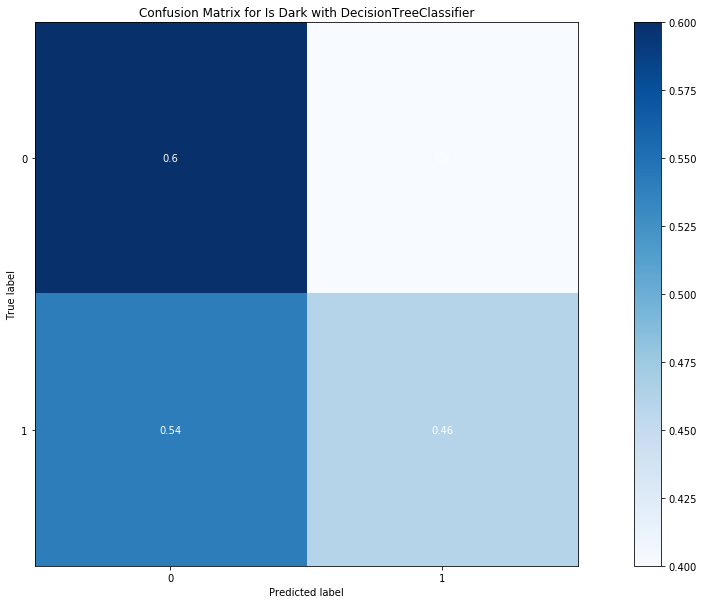

In [33]:
evaluate_features(df_for_model, labels)

## Extra Tree Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s finished


Log loss: 16.25172435770545
Accuracy: 0.5261043685161341
              precision    recall  f1-score   support

           0       0.59      0.58      0.58    236311
           1       0.44      0.46      0.45    172203

   micro avg       0.53      0.53      0.53    408514
   macro avg       0.52      0.52      0.52    408514
weighted avg       0.53      0.53      0.53    408514



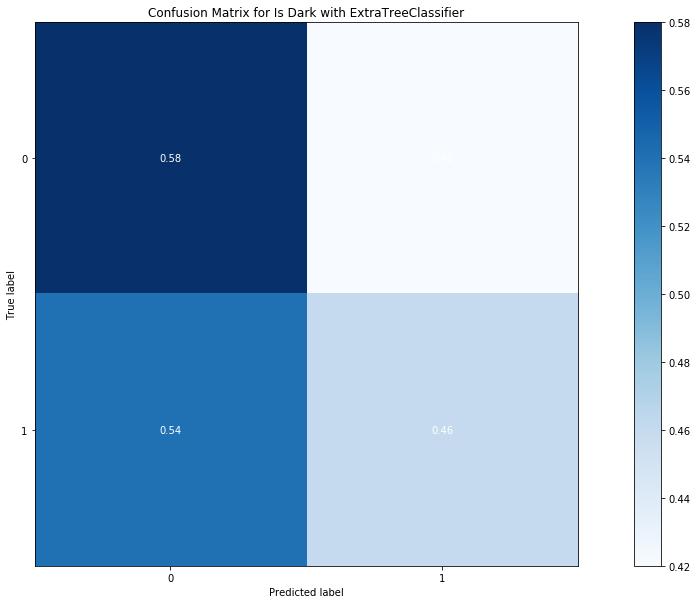

In [34]:
evaluate_features(df_for_model, labels, 1)

## Random Forest Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.2s finished


Log loss: 1.0813637886820002
Accuracy: 0.57095228070519
              precision    recall  f1-score   support

           0       0.60      0.75      0.67    236311
           1       0.49      0.33      0.39    172203

   micro avg       0.57      0.57      0.57    408514
   macro avg       0.55      0.54      0.53    408514
weighted avg       0.55      0.57      0.55    408514



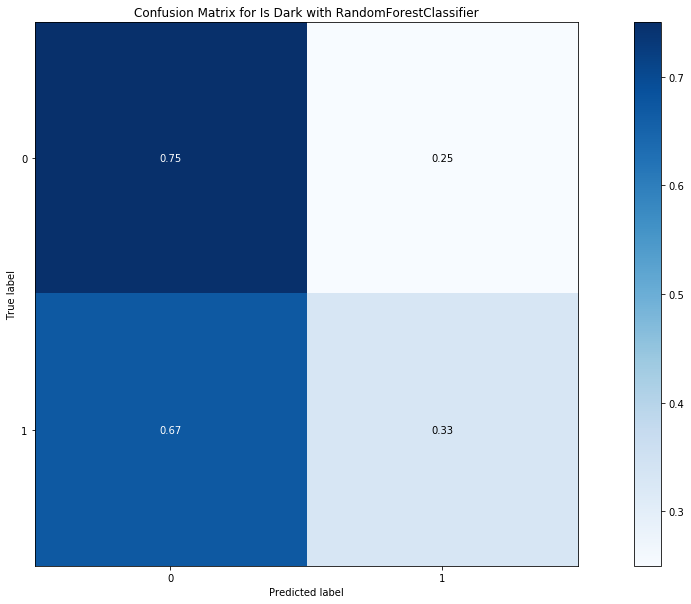

In [35]:
evaluate_features(df_for_model, labels, 2)

## K-Nearest Neighbor Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.5s finished


Log loss: 2.2149645714395816
Accuracy: 0.5580126996871588
              precision    recall  f1-score   support

           0       0.61      0.66      0.63    236311
           1       0.47      0.42      0.44    172203

   micro avg       0.56      0.56      0.56    408514
   macro avg       0.54      0.54      0.54    408514
weighted avg       0.55      0.56      0.55    408514



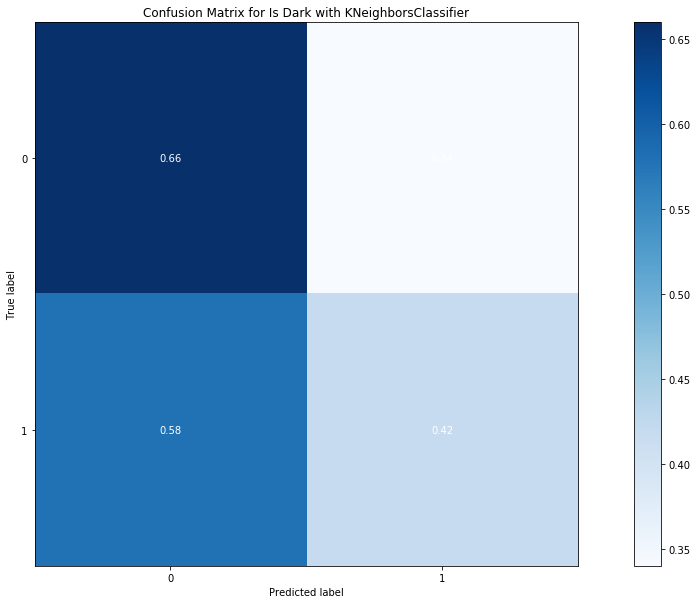

In [36]:
evaluate_features(df_for_model, labels, 3)

## Gaussian NB Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished


Log loss: 0.7260033839821217
Accuracy: 0.5810890202049379
              precision    recall  f1-score   support

           0       0.58      0.98      0.73    236311
           1       0.55      0.03      0.06    172203

   micro avg       0.58      0.58      0.58    408514
   macro avg       0.57      0.51      0.40    408514
weighted avg       0.57      0.58      0.45    408514



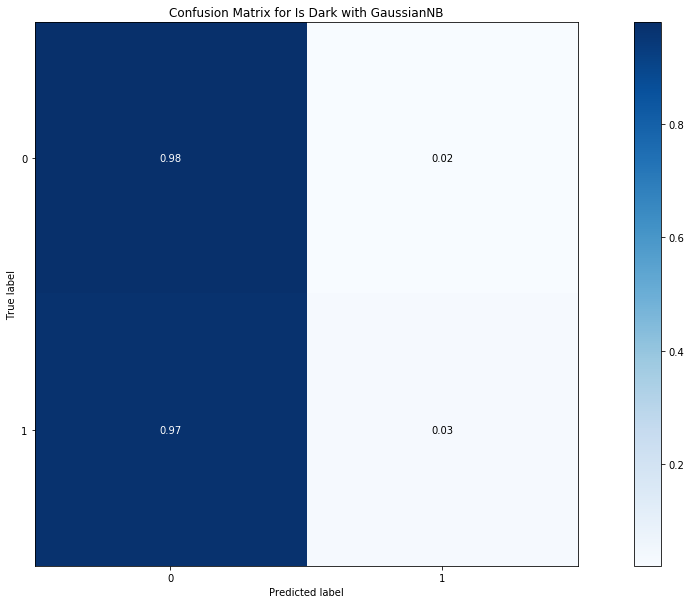

In [37]:
evaluate_features(df_for_model, labels, 4)